## Basic Point Detection

### Harris and Stephens' algorithm

Consider the partial derievative $I_x$ and $I_y$ at any pixel.
We define $\triangledown I$ as following </br>
</br>
$$
\triangledown I = \left[\begin{array}{c}
I_x \\
I_y
\end{array}
\right]
$$

Let $M_I$ as following:</br>

$$
M_I = \triangledown I \triangledown I^{T} = \left[\begin{array}{cc}
I_x^2 & I_xI_y \\
I_xI_y & I_y^2
\end{array}\right]
$$

Note that the eigen value of $M_I$ is $|\triangledown I|^2$ and 0.

Consider the convolution of $M_I$ with some kernel function, $W$, (such as Gaussian kernel) at $x$: </br>
</br>
$$
\overline{M}_I = W \ast M_I
$$

This would be a weighted sum of $M_I$ of pixels around $x$. Consider the eigen value $\lambda_1$ and $\lambda_2$ of $\overline{M}_I$, the intuition is that:

1. If both $\lambda_1$ and $\lambda_2$ are close to zero ==> $\triangledown I$ is zero around $x$ ==> there is just plaint image.
2. If $\lambda_1 > 0$ and $\lambda_2$ is close to zero ==> $\triangledown I$ is very close to each other around $x$ ==> there is an edge.
3. If both $\lambda_1$ and $\lambda_2$ are larger than zero ==> $\triangledown I$ varies arounc $x$ ==> A possible corner point.

One convnient way to detect these conditions without actually compute the eigen value, one may use following indicators:

- $\det(\overline{M}_I) - \kappa\mbox{  }\mbox{trace}(\overline{M}_I)$ for some positive $\kappa$
- $\frac{\det(\overline{M}_I)}{\mbox{trace}(\overline{M}_I)}$

In [1]:
import numpy as np
from scipy.ndimage import filters

In [28]:
def compute_harris_response(im,sigma=3):
    """ Compute the Harris corner detector response function 
        for each pixel in a graylevel image. """
    
    # derivatives
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
    
    # compute components of the Harris matrix
    Wxx = filters.gaussian_filter(imx*imx,sigma)
    Wxy = filters.gaussian_filter(imx*imy,sigma)
    Wyy = filters.gaussian_filter(imy*imy,sigma)
    
    # determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy
    
    return Wdet / Wtr

In [3]:
from PIL import Image

In [12]:
img = Image.open("/Users/DboyLiao/Works/data/faces/empire.jpg").convert("L")

In [13]:
img_data = np.array(img)

In [14]:
img_x = np.zeros(img_data.shape)

In [15]:
img_data.shape

(800, 569)

In [16]:
filters.gaussian_filter(img_data, (5, 5), (0, 1), img_x)

In [17]:
img_x

array([[-0.0052207 , -0.01571243, -0.02632927, ..., -0.11953991,
        -0.0756873 , -0.02591381],
       [-0.00525034, -0.01580561, -0.02649734, ..., -0.11946827,
        -0.0756216 , -0.02588801],
       [-0.00529846, -0.0159583 , -0.0267768 , ..., -0.11916716,
        -0.07539301, -0.02580359],
       ..., 
       [ 0.00329223,  0.00968215,  0.01552786, ...,  0.36001395,
         0.23177748,  0.07991427],
       [ 0.00311672,  0.00917335,  0.01473615, ...,  0.39512003,
         0.25256666,  0.08679496],
       [ 0.00302661,  0.00891219,  0.01432998, ...,  0.41194037,
         0.26250317,  0.09007956]])

In [18]:
img_y = np.zeros(img_data.shape)

In [19]:
filters.gaussian_filter(img_data, (5, 5), (1, 0), img_y)

In [20]:
img_y

array([[ 0.01200173,  0.01196925,  0.01190028, ..., -0.03818438,
        -0.03816005, -0.03814236],
       [ 0.0351493 ,  0.03506338,  0.0348797 , ..., -0.11215724,
        -0.11201735, -0.1119301 ],
       [ 0.05587259,  0.05576603,  0.0555338 , ..., -0.17921693,
        -0.1787755 , -0.17852387],
       ..., 
       [-0.05127859, -0.05170072, -0.05250477, ...,  0.33157545,
         0.36743207,  0.38520489],
       [-0.03158123, -0.03184405, -0.03234439, ...,  0.2222895 ,
         0.24263749,  0.25269933],
       [-0.0106651 , -0.01075431, -0.01092409, ...,  0.07800092,
         0.08458035,  0.08782965]])

In [21]:
Wxx = filters.gaussian_filter(img_x*img_x, 5)

In [22]:
Wxy = filters.gaussian_filter(img_x*img_y, 5)
Wyy = filters.gaussian_filter(img_y*img_y, 5)

In [23]:
Wdet = Wxx*Wyy - Wxy**2

In [24]:
Wtr = Wxx + Wyy

In [25]:
Wdet / Wtr

array([[  7.93803757e-04,   8.16867310e-04,   8.55893802e-04, ...,
          5.71065751e-03,   5.32366913e-03,   5.14093117e-03],
       [  7.96717893e-04,   8.20090749e-04,   8.59688958e-04, ...,
          5.67983856e-03,   5.29049557e-03,   5.10654893e-03],
       [  7.99873498e-04,   8.23701329e-04,   8.64127866e-04, ...,
          5.60513695e-03,   5.21231555e-03,   5.02654074e-03],
       ..., 
       [  1.96389709e-04,   2.05318586e-04,   2.22488163e-04, ...,
          3.86429109e-01,   3.07268471e-01,   2.66719491e-01],
       [  1.96951492e-04,   2.06228611e-04,   2.24098444e-04, ...,
          3.57044705e-01,   2.82951028e-01,   2.44781565e-01],
       [  1.97150056e-04,   2.06597507e-04,   2.24808556e-04, ...,
          3.38954991e-01,   2.68396709e-01,   2.31930278e-01]])

In [31]:
harrisim = compute_harris_response(img_data)

In [32]:
harrisim

array([[  3.86893208e-04,   4.94406378e-04,   7.02395089e-04, ...,
          1.26135274e-02,   1.25711627e-02,   1.23921030e-02],
       [  3.97860476e-04,   5.11607306e-04,   7.29881538e-04, ...,
          1.25060957e-02,   1.24706931e-02,   1.22956827e-02],
       [  4.17350917e-04,   5.42276074e-04,   7.78624073e-04, ...,
          1.20727290e-02,   1.20770236e-02,   1.19260659e-02],
       ..., 
       [  1.39439568e-04,   1.38533109e-04,   1.36258896e-04, ...,
          1.60779413e-01,   1.56946670e-01,   1.52765869e-01],
       [  1.22086293e-04,   1.21496059e-04,   1.20047441e-04, ...,
          1.56940218e-01,   1.54374675e-01,   1.50906688e-01],
       [  1.14646391e-04,   1.14292079e-04,   1.13407191e-04, ...,
          1.52307607e-01,   1.50639628e-01,   1.47702623e-01]])

In [33]:
corner_threshold = harrisim.max()*0.1

In [34]:
harrisim_t = (harrisim > corner_threshold)*1

In [38]:
harrisim_t.nonzero()

(array([210, 210, 210, ..., 799, 799, 799]),
 array([494, 495, 496, ..., 542, 543, 544]))

In [39]:
print np.argsort.__doc__


    Returns the indices that would sort an array.

    Perform an indirect sort along the given axis using the algorithm specified
    by the `kind` keyword. It returns an array of indices of the same shape as
    `a` that index data along the given axis in sorted order.

    Parameters
    ----------
    a : array_like
        Array to sort.
    axis : int or None, optional
        Axis along which to sort.  The default is -1 (the last axis). If None,
        the flattened array is used.
    kind : {'quicksort', 'mergesort', 'heapsort'}, optional
        Sorting algorithm.
    order : list, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  Not all fields need be
        specified.

    Returns
    -------
    index_array : ndarray, int
        Array of indices that sort `a` along the specified axis.
        In other words, ``a[index_array]`` yields a sorted `a`.

    See Also
    --------
    sort :

In [44]:
def get_harris_points(harrisim, min_dist =10, threshold = 0.1):
    corner_threshold = harrisim.max()*threshold
    harrisim_t = (harrisim > corner_threshold)*1
    
    coords = np.array(harrisim_t.nonzero()).T
    candidate_values = [harrisim[c[0], c[1]] for c in coords]
    index = np.argsort(candidate_values)
    allowed_locations = np.zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist, min_dist:-min_dist] = 1
    
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i, 0], coords[i, 1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i, 0] - min_dist):(coords[i,0] + min_dist), (coords[i, 1] - min_dist):(coords[i, 1] + min_dist)] = 0
    return filtered_coords

In [59]:
get_harris_points(harrisim)

[array([760, 543]),
 array([558, 339]),
 array([707, 153]),
 array([785, 380]),
 array([765, 365]),
 array([491, 474]),
 array([720, 157]),
 array([726, 410]),
 array([707, 408]),
 array([669, 321]),
 array([763, 295]),
 array([721, 262]),
 array([553, 408]),
 array([629, 482]),
 array([556, 509]),
 array([391, 488]),
 array([592, 436]),
 array([699, 218]),
 array([302, 485]),
 array([572, 342]),
 array([673, 395]),
 array([635, 271]),
 array([639, 410]),
 array([733, 142]),
 array([558, 349]),
 array([782, 163]),
 array([758, 531]),
 array([507, 461]),
 array([730,  94]),
 array([750, 186]),
 array([718, 140]),
 array([609, 328]),
 array([574, 394]),
 array([721, 180]),
 array([626, 506]),
 array([788, 547]),
 array([657, 500]),
 array([494, 408]),
 array([649, 422]),
 array([528, 413]),
 array([778, 362]),
 array([694, 270]),
 array([586, 339]),
 array([778, 205]),
 array([324, 232]),
 array([717, 496]),
 array([789, 203]),
 array([549, 389]),
 array([656, 220]),
 array([280, 471]),


In [46]:
from pylab import *

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(-100.0, 600.0, 800.0, -100.0)

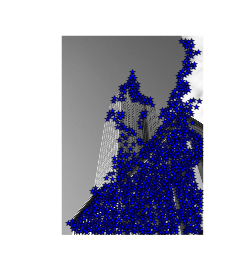

In [67]:
filtered_coords = get_harris_points(harrisim, threshold=0.01)

figure()
gray()
ax = imshow(img)
plot([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], "*")
axis("off")

(-100.0, 600.0, 800.0, -100.0)

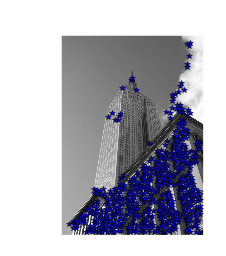

In [68]:
filtered_coords = get_harris_points(harrisim, threshold=0.05)

figure()
gray()
ax = imshow(img)
plot([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], "*")
axis("off")

(-100.0, 600.0, 800.0, -100.0)

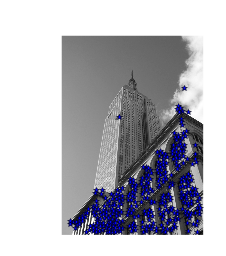

In [69]:
filtered_coords = get_harris_points(harrisim, threshold=0.1)

figure()
gray()
ax = imshow(img)
plot([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], "*")
axis("off")

## SIFT